<a href="https://colab.research.google.com/github/jdgargiulo/Lectures/blob/main/B_medio_y_H_cr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Algoritmo para cálculo automatizado de SIRM, B_1/2, B_cr y S-ratio**

NOTA: El SIRM se calcula como el valor máximo de la magnetización obtenida sobre la curva completa de adquisición, independientemente del campo aplicado.

In [2]:
library(tidyverse)

# Cálculo de B 1/2

Partimos teniendo un data frame con una primera columna que con el campo aplicado en mT y las suscecibas representando la adquisición en mA/m con nombre de columna correspondiente al nombre dado a cada muestra, en formato de archivo tipo .csv. Este archivo se importa en R con el nombre irm (automáticamente).
IMPORTANTE!! Procurar que las tablas estén completas.

In [3]:
irm<-read.csv("/content/irm.csv")

In [4]:
campo<-irm %>% select(1)
adq<- irm %>% select(-1)
colnames(adq) <- paste0("m", 1:ncol(adq))
IRM<-cbind(campo,adq)

In [5]:
View(IRM)

Field,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7,83.9,59.4,101.9,50.2,84.8,30.8,58.69,31.3,38.60,93.15,96.4
4.3,168.1,86.2,145.4,80.3,115.2,44.3,77.75,39.9,49.21,112.16,117.8
10.0,364.1,182.9,356.9,171.3,228.5,105.1,170.68,83.2,105.69,218.30,236.6
15.0,596.0,306.3,642.0,276.0,389.8,189.7,306.77,145.8,185.54,375.94,401.1
21.0,909.0,481.0,1043.0,418.0,616.8,319.1,525.38,237.9,300.54,607.35,655.1
25.0,1151.0,624.0,1351.0,524.0,797.1,430.7,713.49,314.9,400.93,784.12,904.1
36.0,1904.0,1027.0,2244.0,819.0,1463.0,765.0,1317.96,522.3,670.37,1267.77,1638.0
41.0,2263.0,1221.0,2699.0,969.0,1809.0,923.0,1619.32,625.0,805.08,1504.20,2033.0
49.0,2775.0,1539.0,3396.0,1205.0,2425.0,1175.0,2109.96,784.1,987.99,1841.00,2684.0


Se genera un primer gráfico de adquisición vs log(campo) con la intersección en Y sobre la SIRM/2. Se toma el valor de SIRM como el máximo encontrado en la curva.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


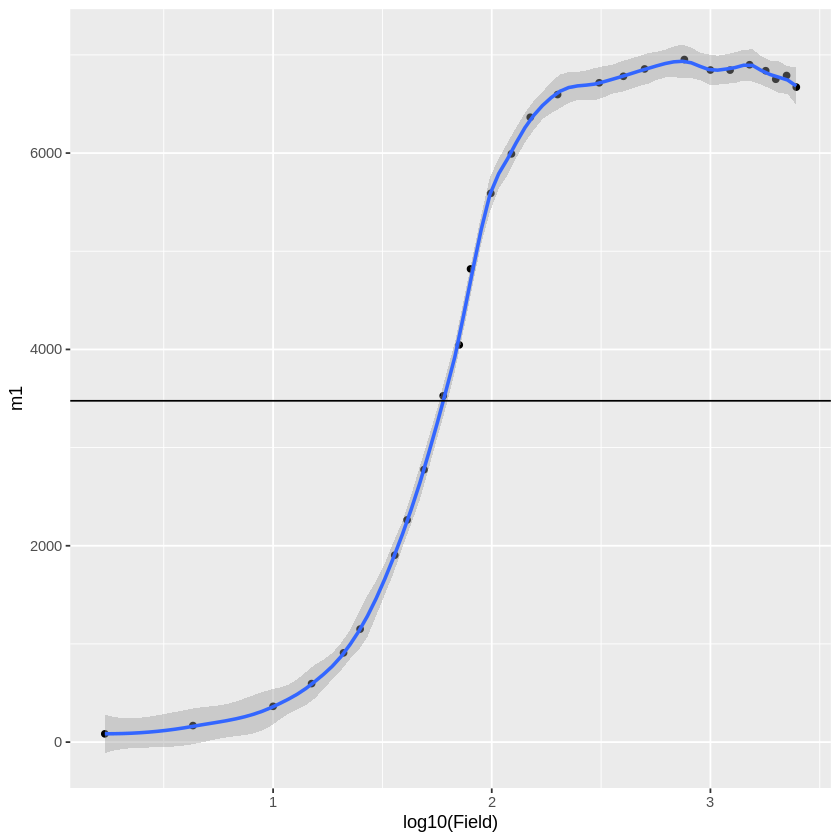

In [6]:
IRM %>% ggplot(aes(x=log10(Field), y=m1)) +
  geom_point() +
  geom_smooth(span=0.2)+
  geom_hline(yintercept = max(irm[2])/2)



El segundo gráfico es igual al primero pero invertido en los ejes la adquisición sobre el eje X, y el log(campo) en el eje Y

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


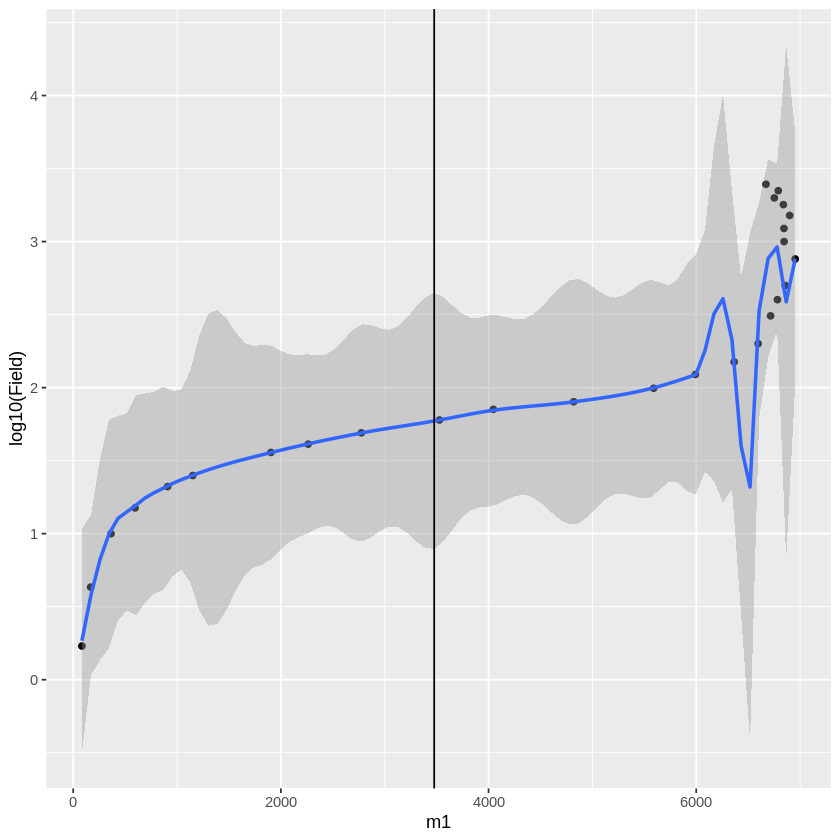

In [7]:
IRM %>% ggplot(aes(y=log10(Field), x=m1)) +
  geom_point() +
  geom_smooth(span=0.2)+
  geom_vline(xintercept = max(IRM$m1)/2)

Se ajusta una fuanción de suavizado loess (regresión local polinómica) donde de la variable de respuesta es el campo aplicado, y la regresora es la magnetización adquirida.

In [8]:
loess.filter <- function(x, y, span) {
  loess_fit <- loess(y ~ x, span = span)
  return(loess_fit)
}

Aplicamos la función loess.filter a cada columna del DF adq

In [9]:
suavizado <- lapply(adq, loess.filter, y = log10(irm$Field), span = 0.2)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 9072.6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 101.63”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 900”


Evaluamos la función en cada SIRM/2 para hallar los B1/2

In [10]:
predictions <- lapply(suavizado, function(loess_fit) {
  predict(loess_fit, newdata = data.frame(x = 0.5*(apply(adq, 2, max))))})

Valores de B1/2 calculados

In [11]:
print(10**predictions[[1]])

      m1       m2       m3       m4       m5       m6       m7       m8 
59.11399 41.66788 75.75735 30.77810 63.62959 32.01698 50.38830 23.60045 
      m9      m10      m11 
26.54037 39.64790 75.52535 


# Cálculo de H_cr

El DF debe de tener el campo en primera columna, y las columnas siguientes serán las magnetizaciones en campo reverso para cada columna.

In [12]:
backfield<-read.csv("/content/backfield.csv")

In [14]:
campoB<-backfield %>% select(1)
back<-backfield %>% select(-1)
colnames(back) <- paste0("m", 1:ncol(back))
Backfield<-cbind(campoB,back)
Backfield

Field,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
-1.7,6162,4193.0,8344.0,2782.0,6439,2842,5308,1877,2300,4096,7722.0
-4.3,5676,3968.0,7724.0,2500.0,6167,2687,5060,1801,2179,3923,7518.0
-10.0,4908,3448.0,6549.0,2105.0,5541,2295,4192,1551,1764,3209,6801.0
-15.0,3725,2852.0,5315.0,1672.0,4673,1890,3499,12900,1442,2614,5877.0
-21.0,2871,2261.0,3849.0,1212.0,3530,1404,2552,958,1066,1891,4492.0
-25.0,2084,1799.0,2788.0,873.0,2674,1025,1861,738,747,1426,3470.0
-29.0,1393,1364.0,1833.0,55.0,1829,744,1203,530,498,980,2552.0
-36.0,183,609.0,278.0,-4.9,507,151,225,190,108,280,1004.0
-41.0,-529,126.3,-821.8,-294.0,-406,-207,-510,-32,-140,-145,18.8


In [17]:
loess.filter <- function(x, y, span) {
  loess_fit <- loess(y ~ x, span = span)
  return(loess_fit)
}

In [18]:
suavizadoB <- lapply(back, loess.filter, y = backfield$Field, span = 0.2)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3046”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 54”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”


In [19]:
predictionsB <- lapply(suavizadoB, function(loess_fit) {
  predict(loess_fit, newdata = data.frame(x = 0))})

In [20]:
result_list <- list()
for (i in 2:ncol(irm)) {
  result <- data.frame(
    muestra = colnames(irm[i]),
    SIRM = max(irm[, i]),
    SIRM_2 = max(irm[, i]) / 2
  )
  result_list[[i - 1]] <- result
}
SIRM <- do.call(rbind, result_list)

Acá se calculan los paámetros y se arma el DF resumen

In [21]:
S<-filter(backfield, Field==-300) %>% select(-Field)
S<-round((-1)*S/SIRM$SIRM,3)
B_medio<-round(10**predictions[[1]],1)
Hcr<-round((-1)*unlist(predictionsB),1)
resumen<-cbind(SIRM, B_medio, Hcr, unlist(S))
print(resumen)

    muestra SIRM SIRM_2 B_medio  Hcr unlist(S)
m1     X1.7 6953 3476.5    59.1 37.2     0.918
m2     X2.5 4590 2295.0    41.7 42.3     0.924
m3     X3.3 9028 4514.0    75.8 37.2     0.927
m4     X4.2 3075 1537.5    30.8 33.1     0.921
m5     X4.3 7428 3714.0    63.6 38.7     0.920
m6     X4.4 3254 1627.0    32.0 38.0     0.930
m7  X5.2.2. 5750 2875.0    50.4 37.5     0.962
m8     X5.3 2108 1054.0    23.6 40.3     0.917
m9     X6.2 2490 1245.0    26.5 38.1     0.941
m10    X7.2 4319 2159.5    39.6 39.2     0.943
m11    X8.3 8986 4493.0    75.5 41.1     0.922


Plot de Backfield de m1

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


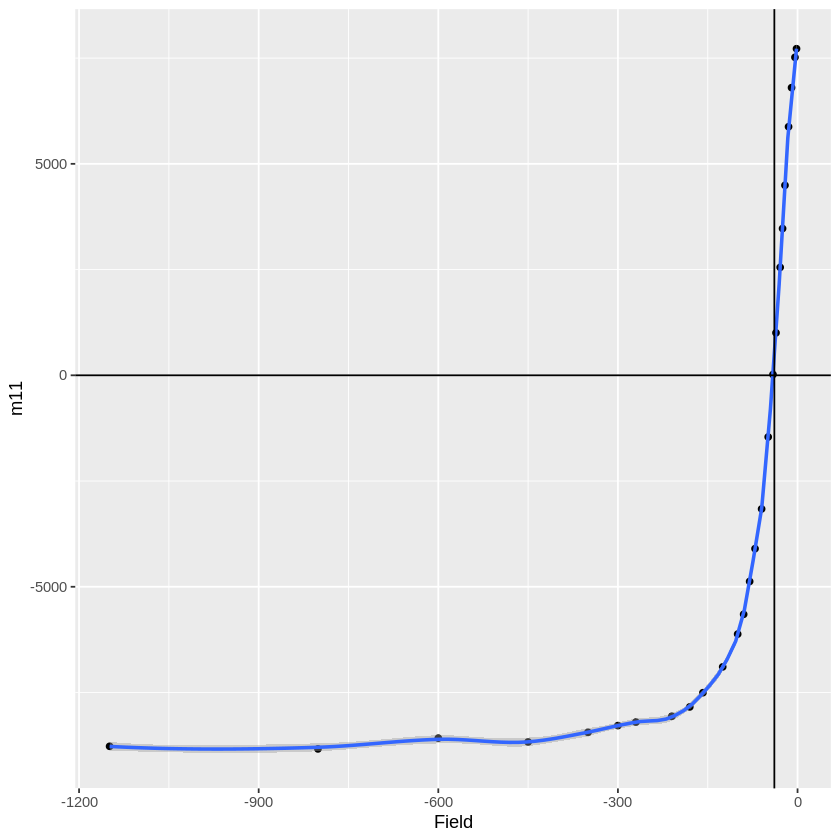

In [23]:
Backfield %>% ggplot(aes(x=Field, y=m11)) +
  geom_point()+
  geom_smooth(span=0.2)+
  geom_vline(xintercept = predictionsB$m5, show.legend = T)+
  geom_hline(yintercept = 0)